In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | 1: woman, 2: men
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [2]:
data = pd.read_csv("cardio_train.csv", sep = ";", index_col= "id")
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.shape

(70000, 12)

In [4]:
data["age_years"] = (data["age"]/365).astype(int)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


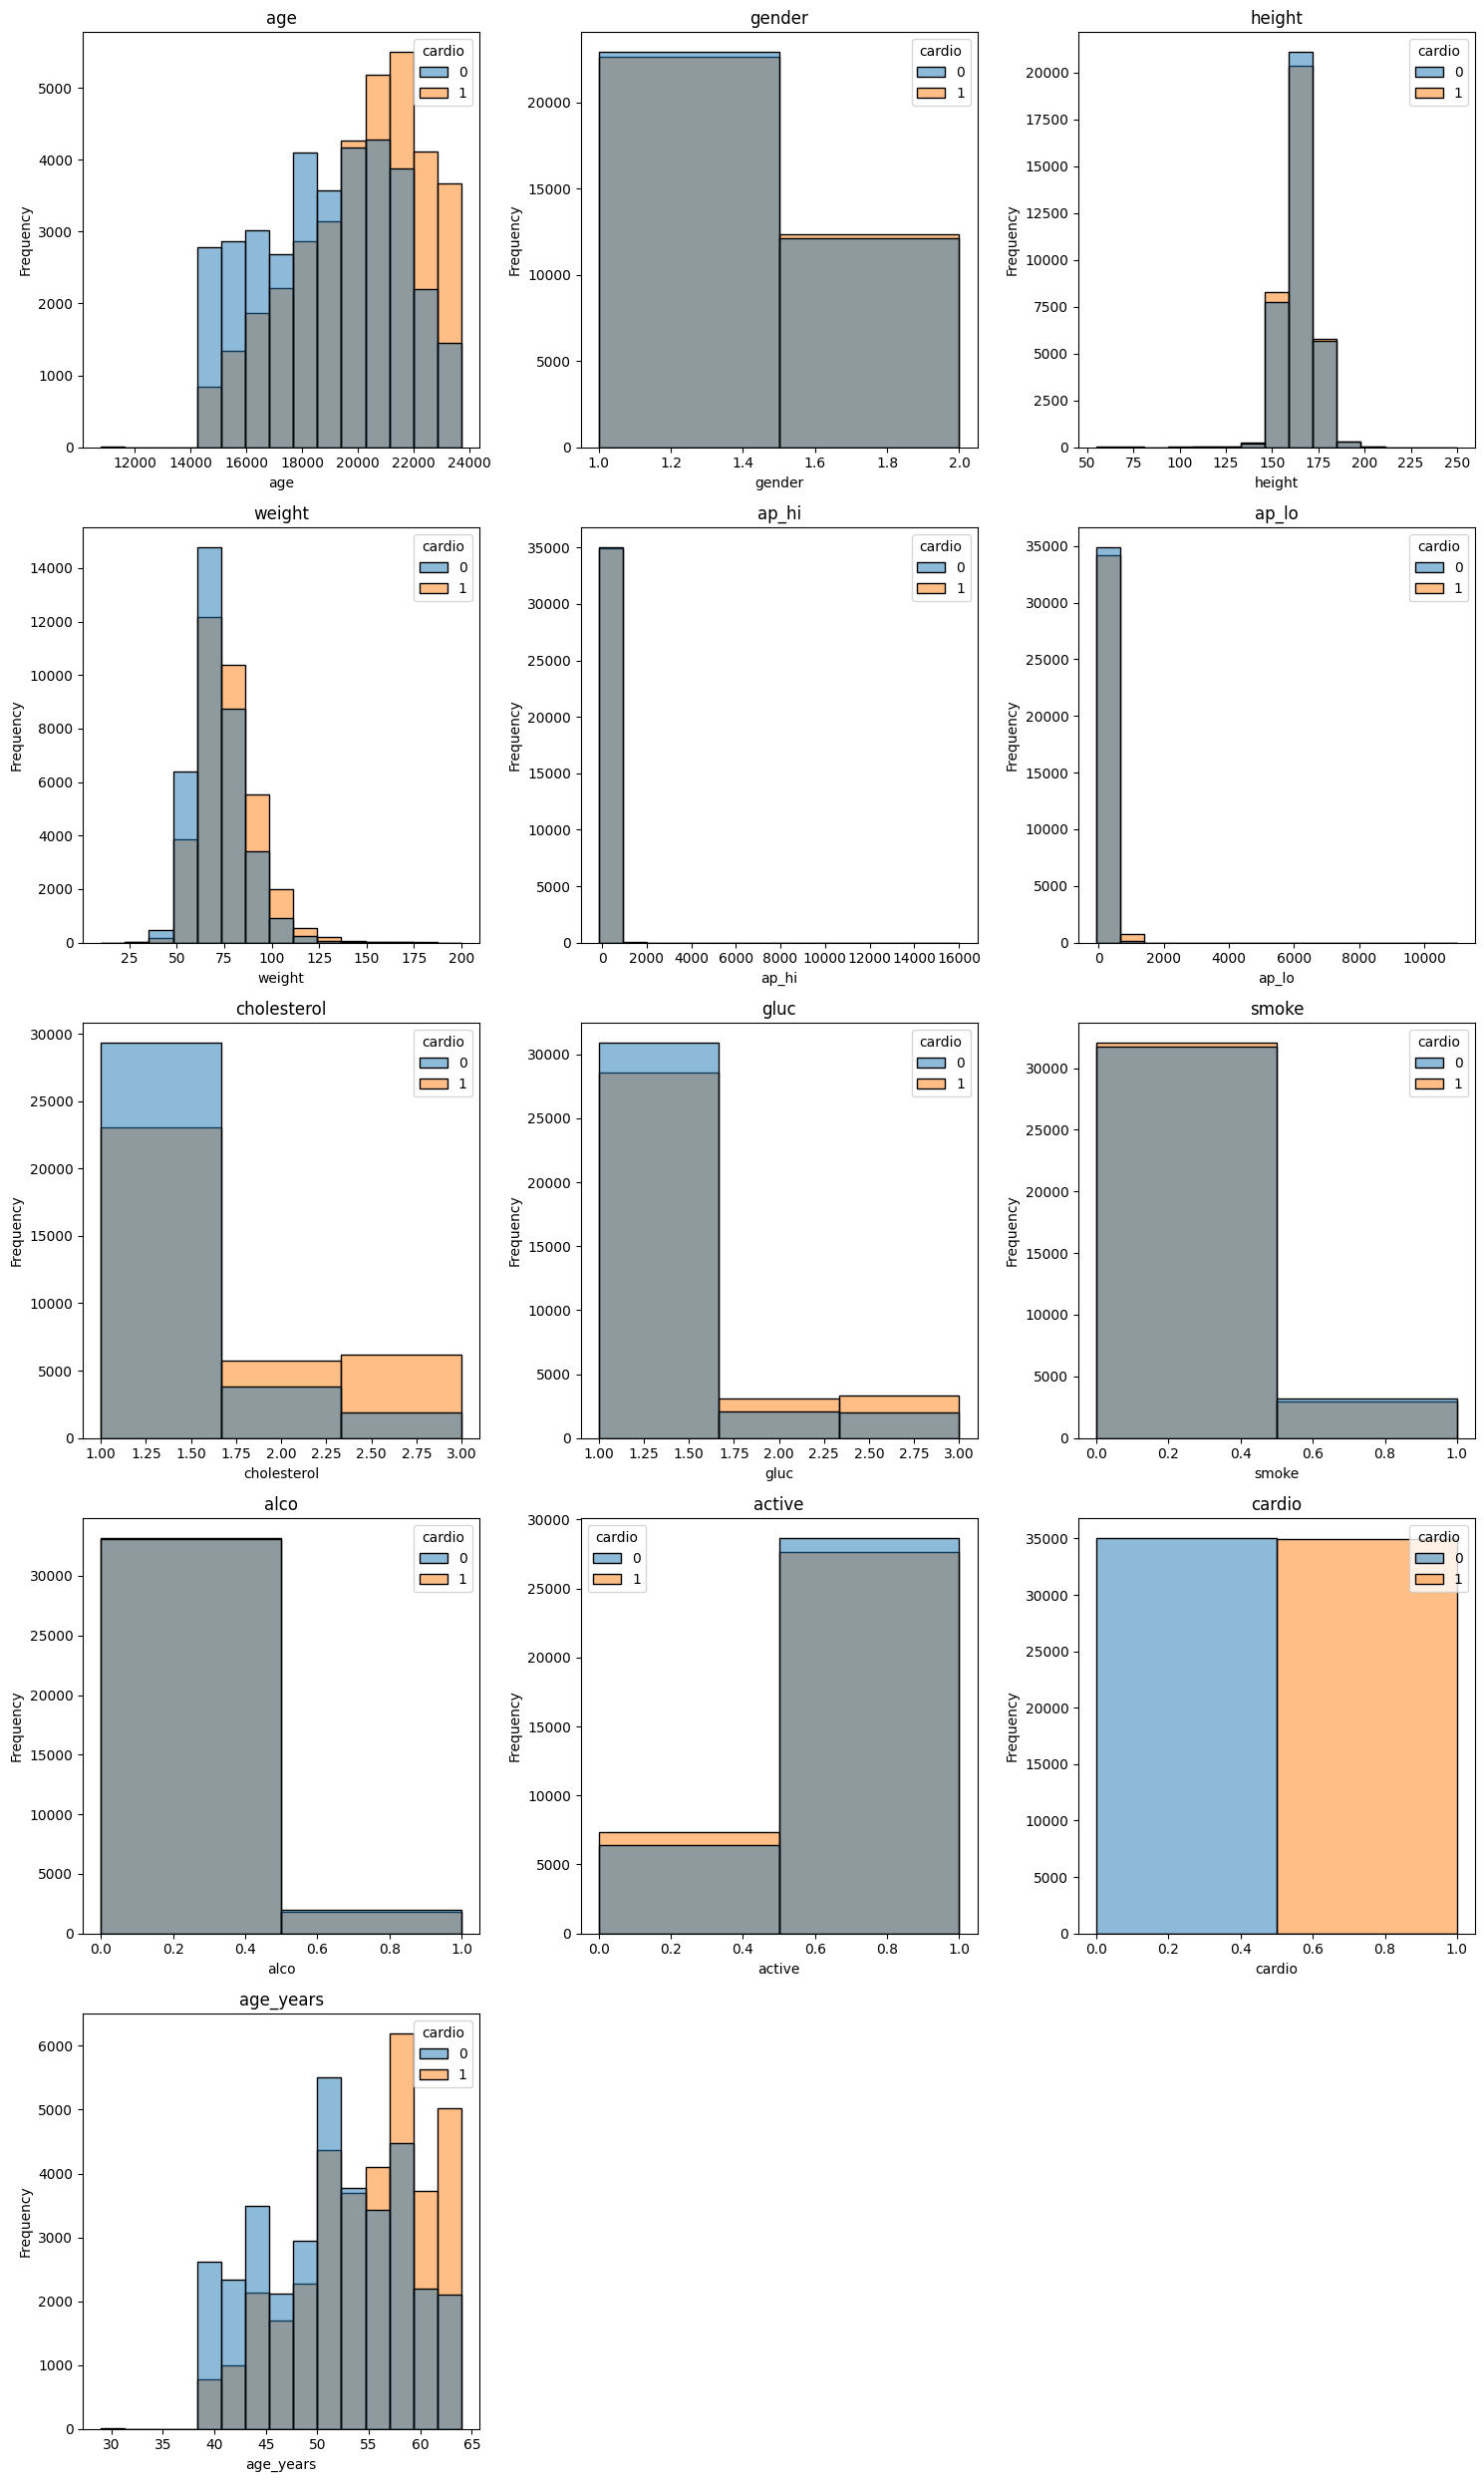

In [5]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "cardio", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

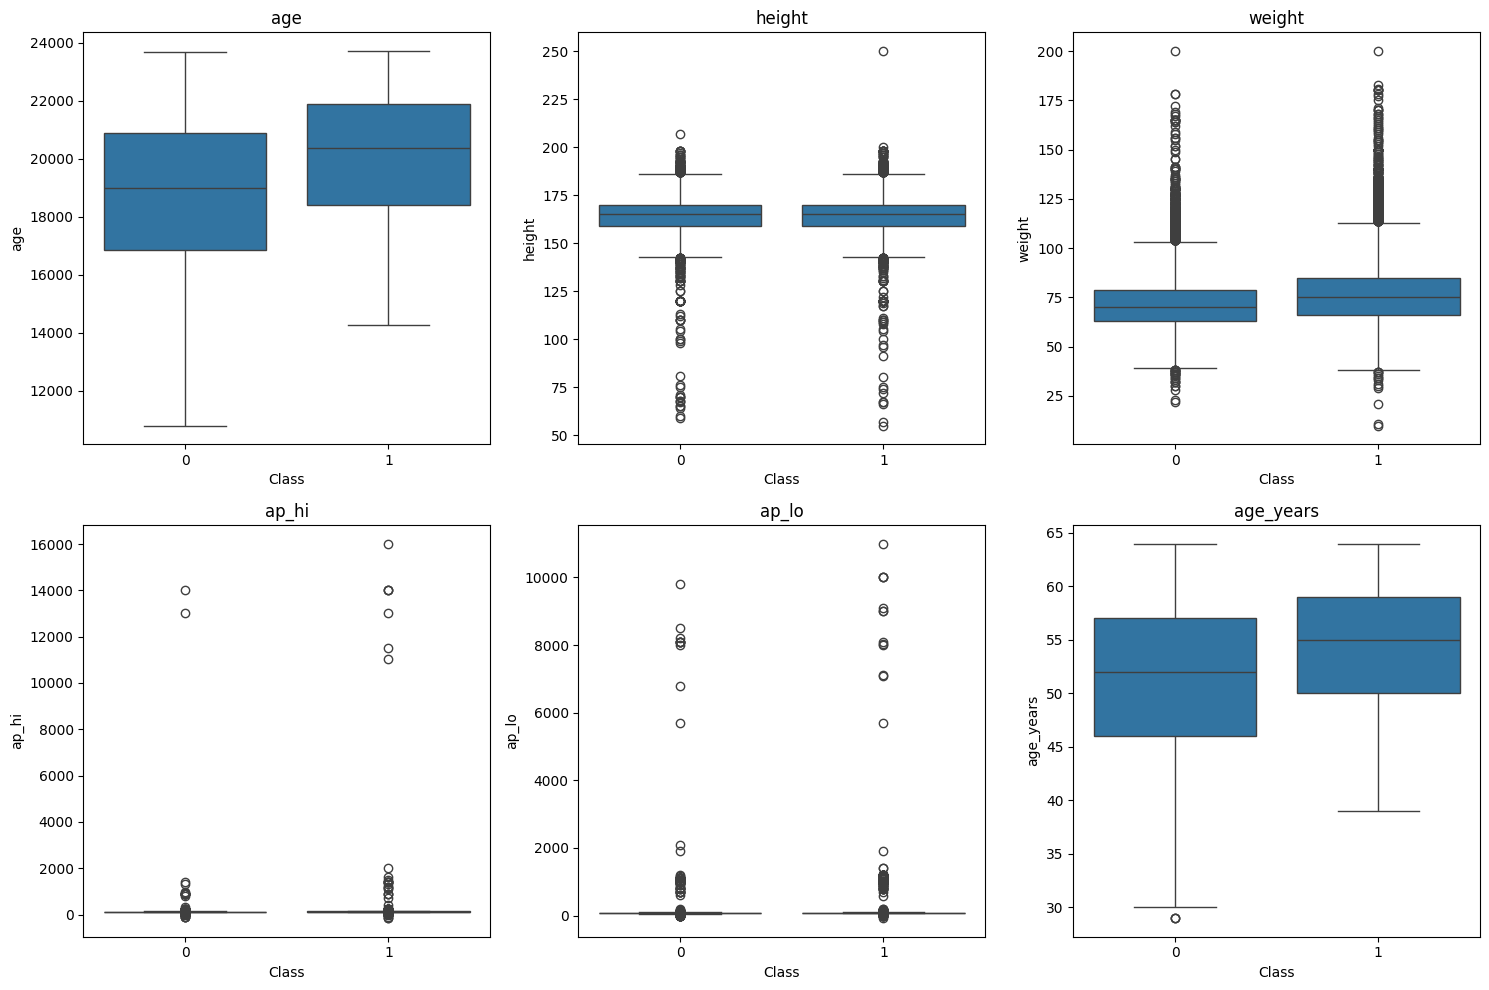

In [6]:
numerical_vars = [col for col in data.select_dtypes(include='number').columns if data[col].nunique() > 5]
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create boxplots
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    sns.boxplot(data=data, x='cardio', y=variable, ax=ax)  # Change to boxplot
    ax.set_title(variable)
    ax.set_xlabel('Class')
    ax.set_ylabel(variable)

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
data.agg(['min', 'max'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
min,10798,1,55,10.0,-150,-70,1,1,0,0,0,0,29
max,23713,2,250,200.0,16020,11000,3,3,1,1,1,1,64


In [8]:
def clean_data(df):
    df = df[df["height"].between(140, 210)]
    df = df[df["ap_hi"].between(0, 500)]
    df = df[df["ap_lo"].between(0, 250)]
    df = df[df["weight"] > 50]
    
    return df

In [9]:
data = clean_data(data)
data.agg(["min", "max"])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
min,10798,1,140,50.7,7,0,1,1,0,0,0,0,29
max,23713,2,207,200.0,401,190,3,3,1,1,1,1,64


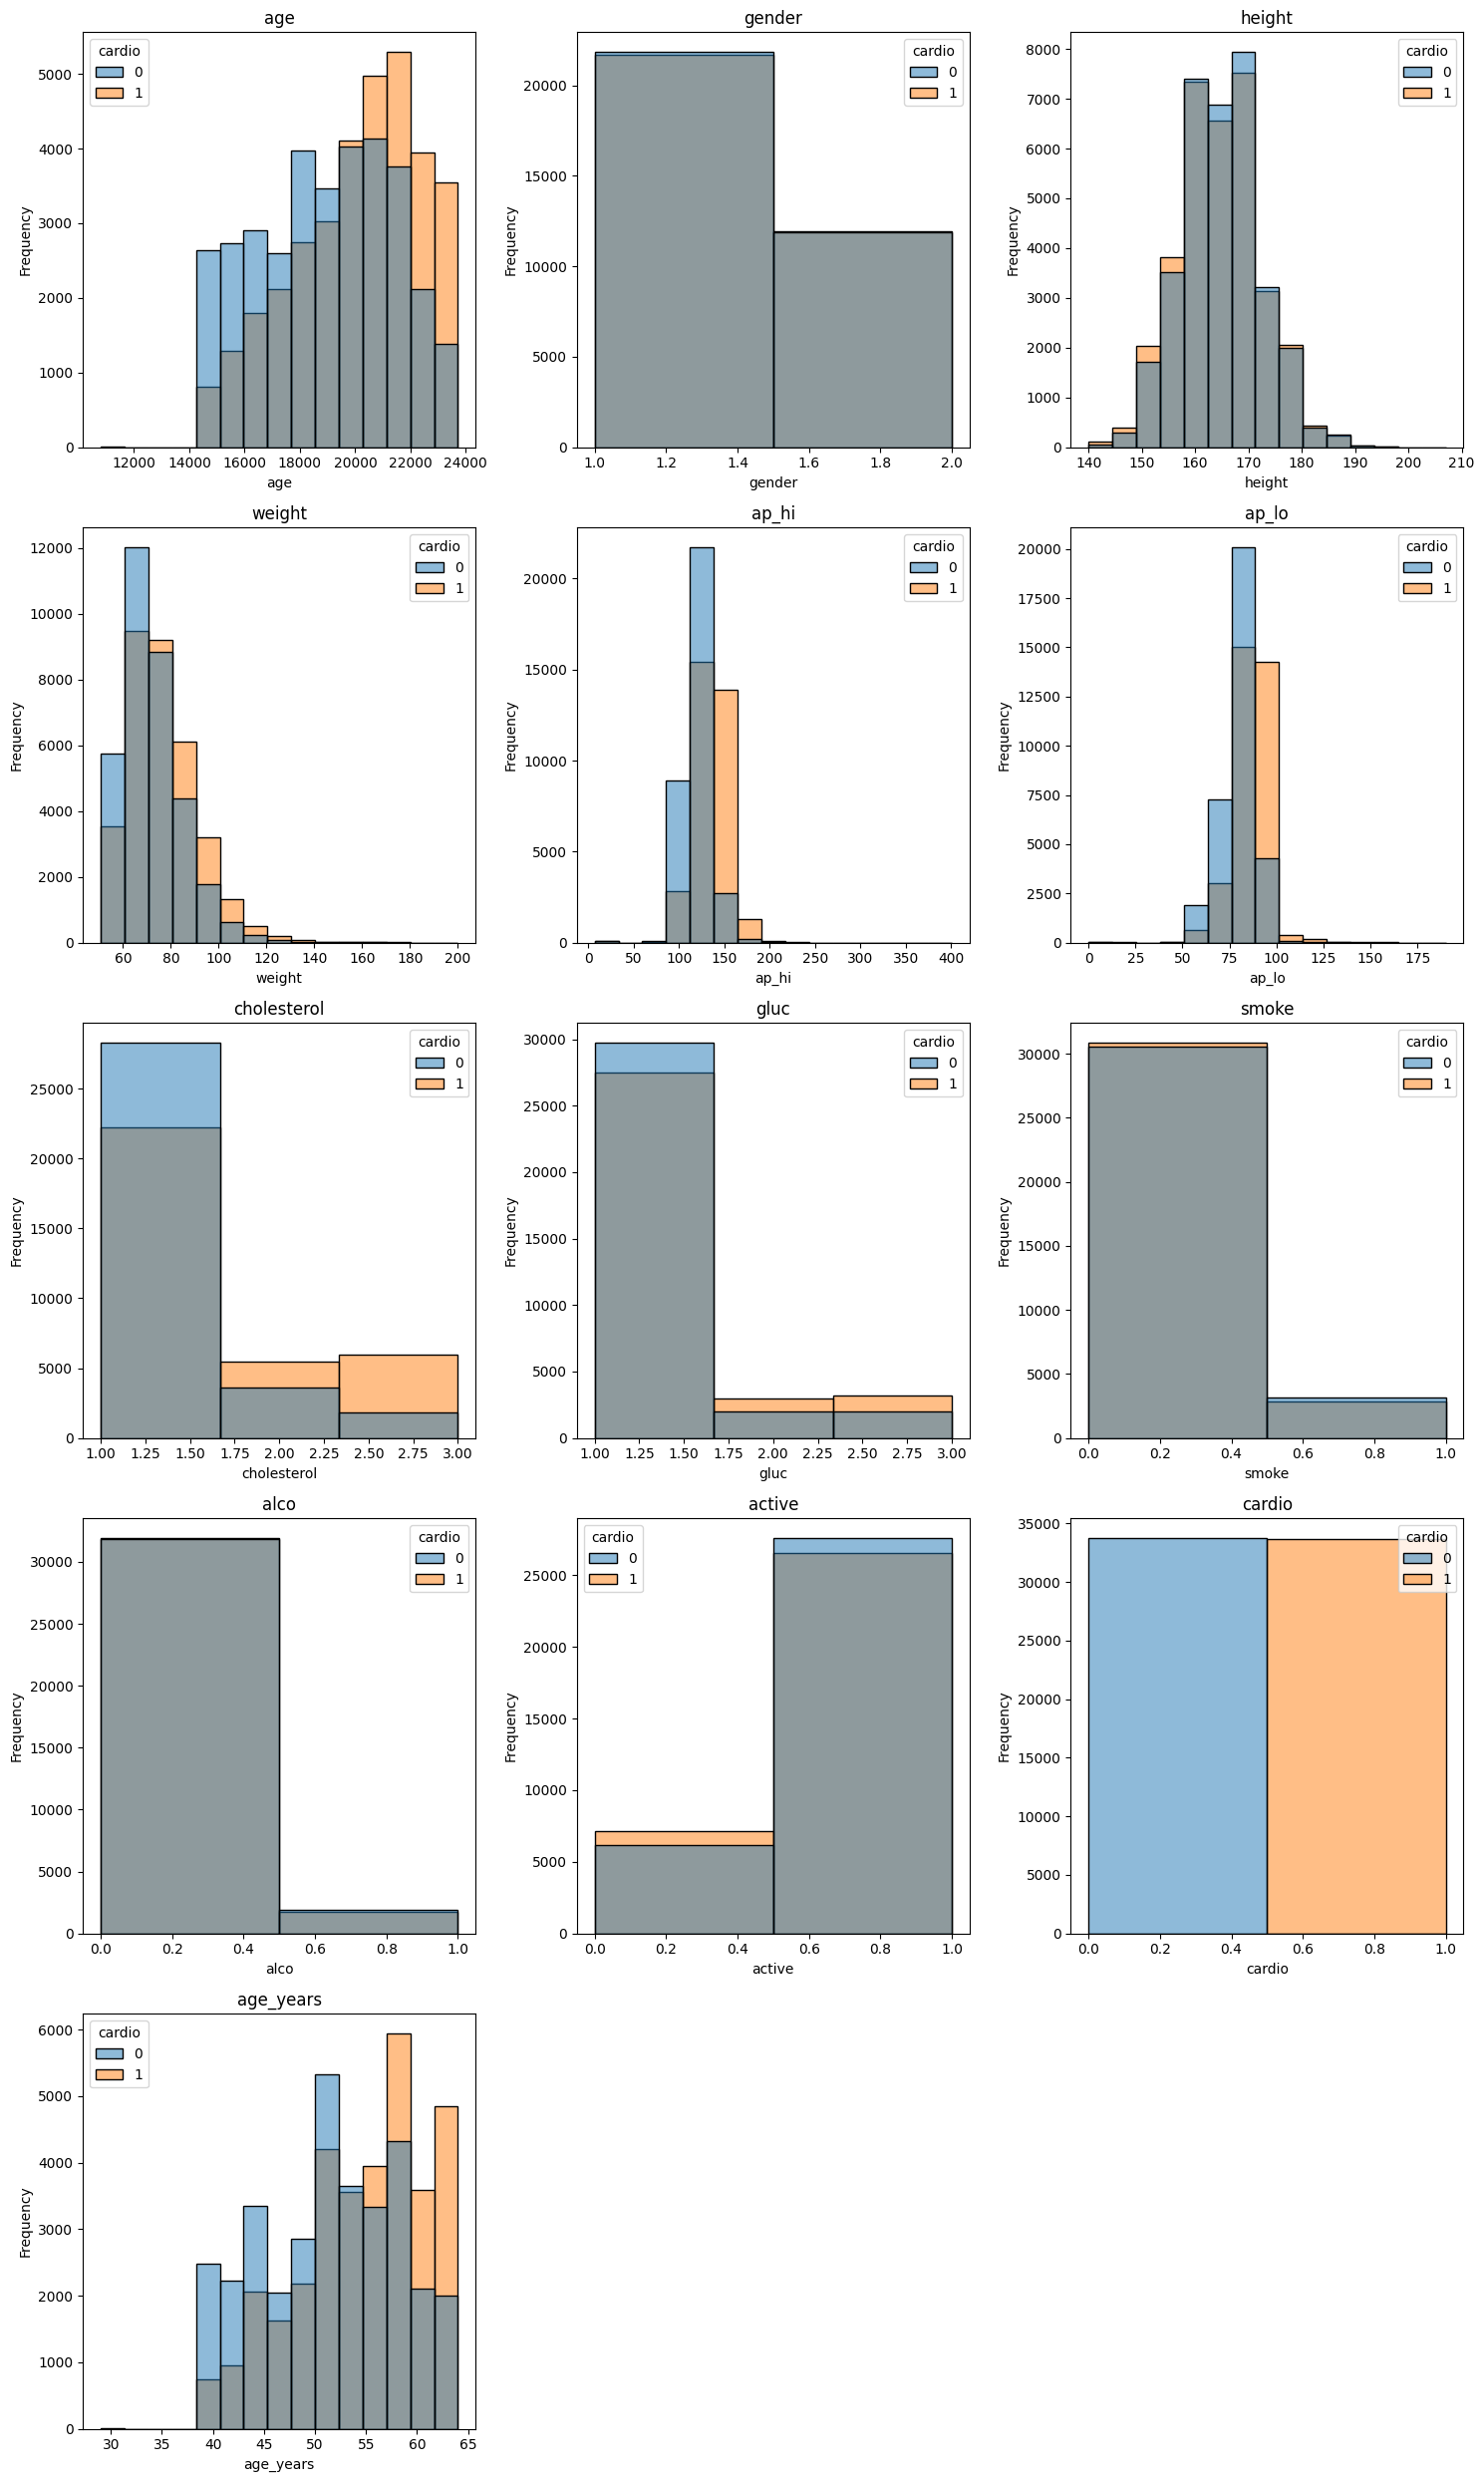

In [10]:
numerical_vars = data.select_dtypes(include='number').columns.tolist()
ncols = 3

# Calculate the number of rows needed based on the number of columns
nrows = -(-len(numerical_vars) // ncols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Flatten the 2D array of subplots to a 1D array for easier indexing
axes = axes.flatten()

# Loop through variables and create histograms
for i, variable in enumerate(numerical_vars):
    ax = axes[i]
    bins = min([len(data[variable].value_counts()),15])
    sns.histplot(data = data, x = variable, ax=ax, bins = bins, hue = "cardio", hue_order = [0,1])
    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This data showed several inconsistencies, with a very big population of people older than 30 years weighting less than 50kg, people with less than 100cm and people with crazy blood pressure. The data is clean, but does not show accurate measurements at all.

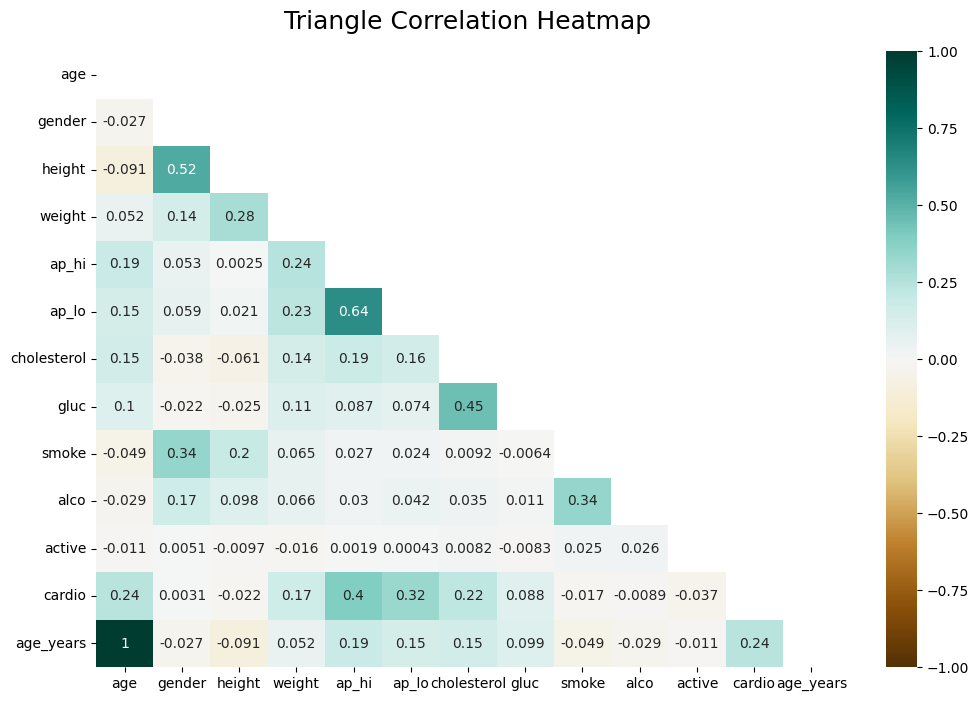

In [13]:
plt.figure(figsize=(12, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool_))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()